<a href="https://colab.research.google.com/github/zaccowan/MLA_ZSC/blob/main/MLA1_ZSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning Assignment 1
<br>
Zac Cowan
<br>
CS430
<br>
Machine Learning in the Cloud**

In [156]:
import pandas as pd

In [157]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [158]:
df = pd.read_csv("drive/MyDrive/MLA/MLA1/weather_2012.csv")

In [159]:
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [160]:
df.tail()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,2012-12-31 23:00:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [161]:
df.sample(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8628,2012-12-25 12:00:00,-9.4,-14.4,67,9,24.1,101.92,Cloudy
7522,2012-11-09 10:00:00,2.3,-3.3,66,19,48.3,101.36,Cloudy
1111,2012-02-16 07:00:00,1.7,-0.9,83,7,12.9,101.96,Cloudy
4439,2012-07-03 23:00:00,20.8,14.8,69,0,25.0,100.32,Rain Showers
2990,2012-05-04 14:00:00,16.0,12.5,80,9,24.1,100.73,Cloudy


In [162]:
print(df.columns)

Index(['Date/Time', 'Temp (C)', 'Dew Point Temp (C)', 'Rel Hum (%)',
       'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)', 'Weather'],
      dtype='object')


In [163]:
df=df.rename(columns={"Date/Time": "date_time",
                   "Temp (C)": "temp_c",
                   "Dew Point Temp (C)": "dew_point",
                   "Rel Hum (%)": "relative_humidity",
                   "Wind Spd (km/h)": "wind_speed",
                   "Visibility (km)": "visibility",
                   "Stn Press (kPa)": "pressure",
                   "Weather": "weather"})


In [164]:
df_num=df.select_dtypes("number")

In [165]:
df_num.mean()

,0
temp_c,8.798144
dew_point,2.555294
relative_humidity,67.431694
wind_speed,14.945469
visibility,27.664447
pressure,101.051623


In [166]:
df_num.count()

,0
temp_c,8784
dew_point,8784
relative_humidity,8784
wind_speed,8784
visibility,8784
pressure,8784


In [167]:
df['temp_f'] = (df["temp_c"] * 9 / 5) + 32

In [168]:
col = df.pop("temp_f")
df.insert(1, "temp_f", col)

In [169]:
df.dtypes

,0
date_time,object
temp_f,float64
temp_c,float64
dew_point,float64
relative_humidity,int64
wind_speed,int64
visibility,float64
pressure,float64
weather,object


In [170]:
df["date_time"] = pd.to_datetime(df["date_time"])

In [172]:
monthly_avg=pd.Series(df.groupby(pd.PeriodIndex(df['date_time'], freq="m"))['temp_f'].mean().tolist())
monthly_avg

,0
0,18.731290
1,24.395000
2,37.618226
3,44.616750
4,61.227984
5,68.241250
6,73.022097
7,72.102742
8,61.672000
9,51.718952


Text(0.5, 0, 'Temperature (F)')

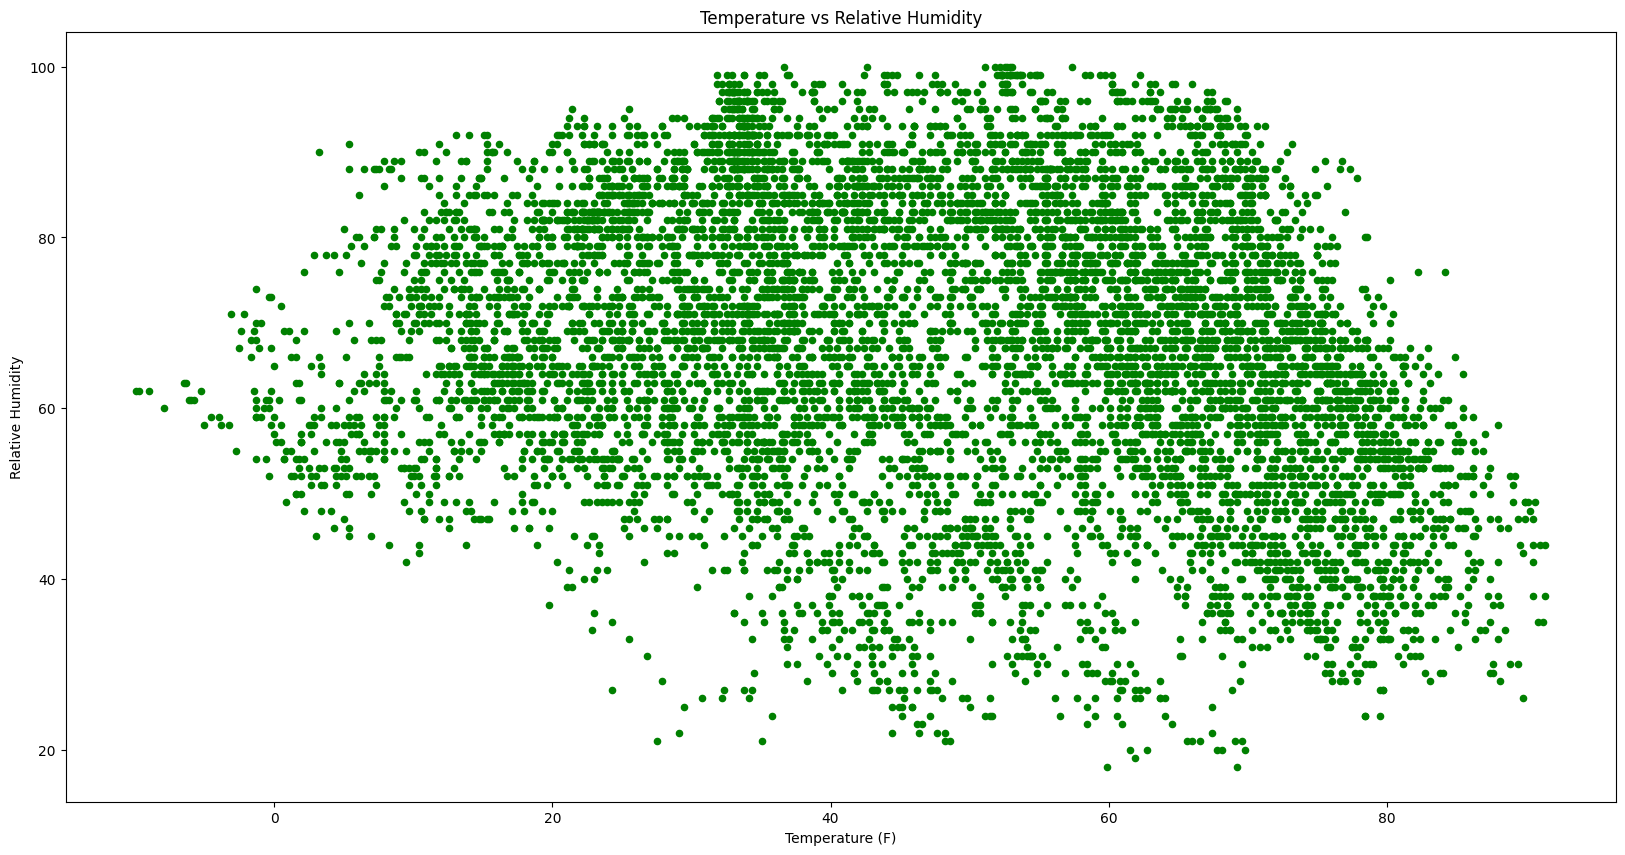

In [186]:
scatter_plot=df.plot.scatter("temp_f", "relative_humidity", c="green", title="Temperature vs Relative Humidity", figsize=(20,10))
scatter_plot.set_ylabel("Relative Humidity")
scatter_plot.set_xlabel("Temperature (F)")

Text(0, 0.5, 'Temperature (F)')

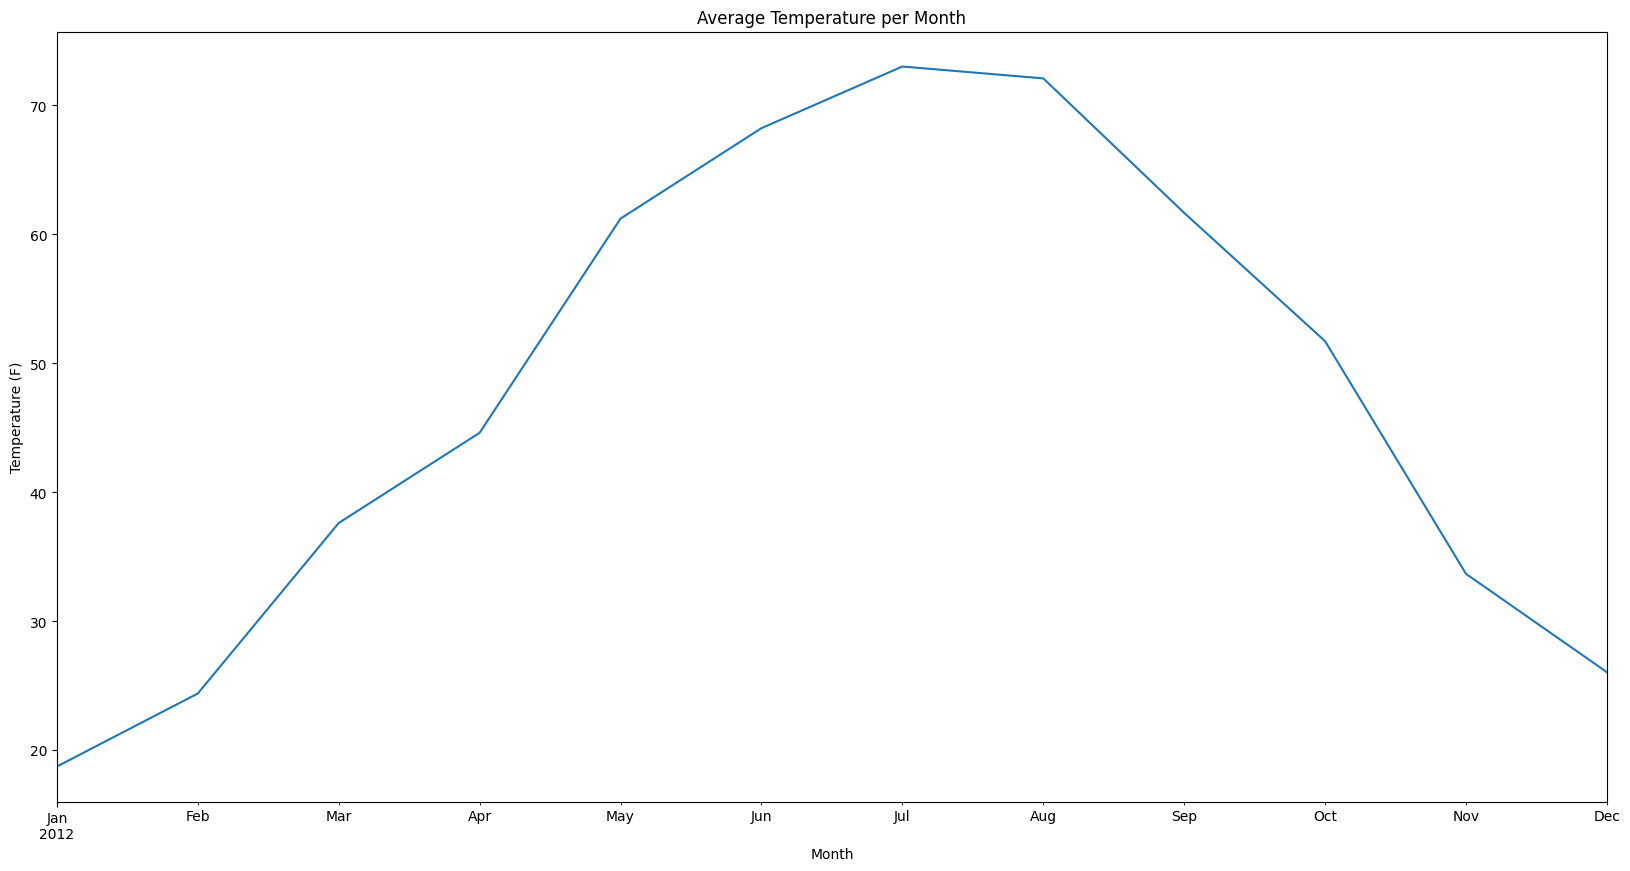

In [193]:
line_plot=df.groupby(pd.PeriodIndex(df['date_time'], freq="m"))["temp_f"].mean().plot.line("date_time", "temp_f", title="Average Temperature per Month",figsize=(20,10))
line_plot.set_xlabel("Month")
line_plot.set_ylabel("Temperature (F)")

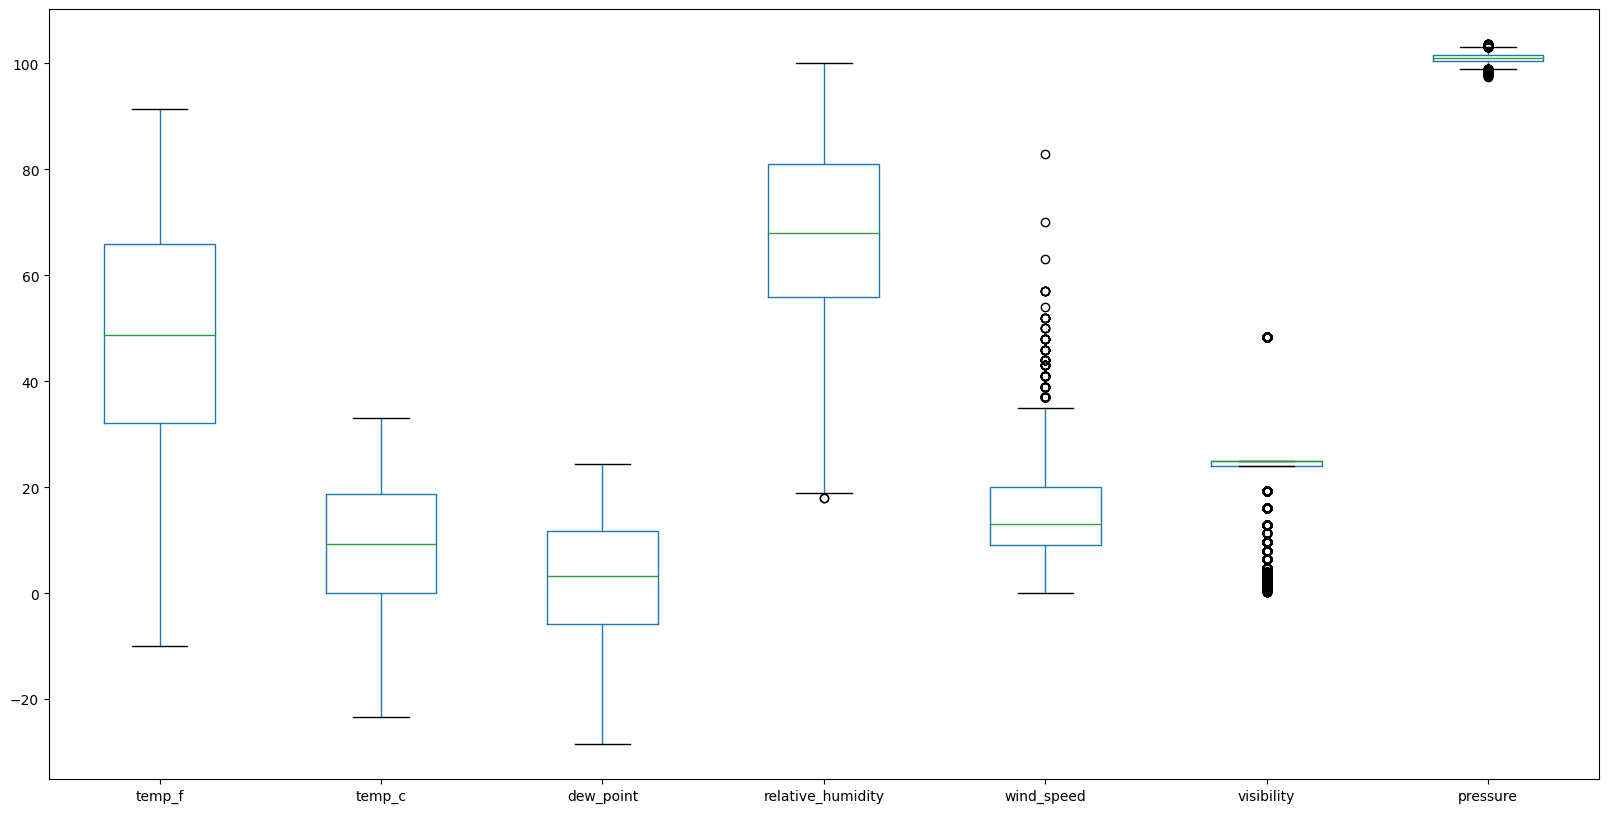

In [201]:
box_plot=df.boxplot(figsize=(20,10), grid=False)
